In [1]:
import json
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


with open('../script/config_samples/benchmark_power_baseline.json') as fp:
    config_dict = json.load(fp)
    monitor_log_path = config_dict['monitor_log_path']
    monitor_log_filename = monitor_log_path.split('/')[-1]
    monitor_interval_ms = float(config_dict['monitor_interval'])

with open(f'../benchmark/{monitor_log_filename}') as fp:
    logs = json.loads(fp.read())
keys = [(res, flag)
        for log in logs
        for res, res_log in log.items()
        for flag, v in res_log.items()]
df = pd.DataFrame({(res, flag): [log[res].get(flag, np.nan) for log in logs] for res, flag in keys})
df.index = monitor_interval_ms * np.arange(len(logs)) / 1000
df.index.name = 'Time (s)'
df.head()

thermal                                                     \
         TZ_TEMPERATURE_0 TZ_TEMPERATURE_1 TZ_TEMPERATURE_2 TZ_TEMPERATURE_3   
Time (s)                                                                       
0.00                  NaN              NaN              NaN              NaN   
0.03              33200.0          36600.0          37000.0          36600.0   
0.06              33600.0          37800.0          38200.0          37000.0   
0.09              33200.0          37000.0          37800.0          37000.0   
0.12              33900.0          38600.0          38600.0          37800.0   

                                                                              \
         TZ_TEMPERATURE_4 TZ_TEMPERATURE_5 TZ_TEMPERATURE_6 TZ_TEMPERATURE_7   
Time (s)                                                                       
0.00                  NaN              NaN              NaN              NaN   
0.03              36300.0          40900.0          39000.0          42000.0   
0.06              36600.0          42000.0          40500.0          39700.0   
0.09              36600.0          41300.0          39300.0          38200.0   
0.12              37800.0          42400.0          40500.0          41300.0   

                                            ...        cpu_freq               \
         TZ_TEMPERATURE_8 TZ_TEMPERATURE_9  ... CUR_FREQ_LITTLE CUR_FREQ_BIG   
Time (s)                                    ...                                
0.00                  NaN              NaN  ...             NaN          NaN   
0.03              42400.0          41700.0  ...       1785600.0    2419200.0   
0.06              46300.0          44800.0  ...       1785600.0    2419200.0   
0.09              46700.0          42400.0  ...       1785600.0    2131200.0   
0.12              40900.0          41700.0  ...       1785600.0    1497600.0   

                              dev_freq        power_supply  \
         CUR_FREQ_PRIMARY CUR_FREQ_GPU CURRENT_NOW_charger   
Time (s)                                                     
0.00                  NaN          NaN                 NaN   
0.03            2841600.0     257000.0                93.0   
0.06            2227200.0     257000.0                93.0   
0.09            2841600.0     257000.0                93.0   
0.12            2841600.0     257000.0                93.0   

                                                                      \
         CURRENT_NOW_battery CURRENT_AVG_battery VOLTAGE_NOW_charger   
Time (s)                                                               
0.00                     NaN                 NaN                 NaN   
0.03                  -128.0                 0.0              4368.0   
0.06                  -676.0                 0.0              4368.0   
0.09                  -676.0                 0.0              4368.0   
0.12                  -676.0                 0.0              4368.0   

                                                  
         VOLTAGE_NOW_battery VOLTAGE_AVG_battery  
Time (s)                                          
0.00                     NaN                 NaN  
0.03                  4358.0              4375.0  
0.06                  4358.0              4375.0  
0.09                  4256.0              4375.0  
0.12                  4256.0              4375.0  

[5 rows x 100 columns]

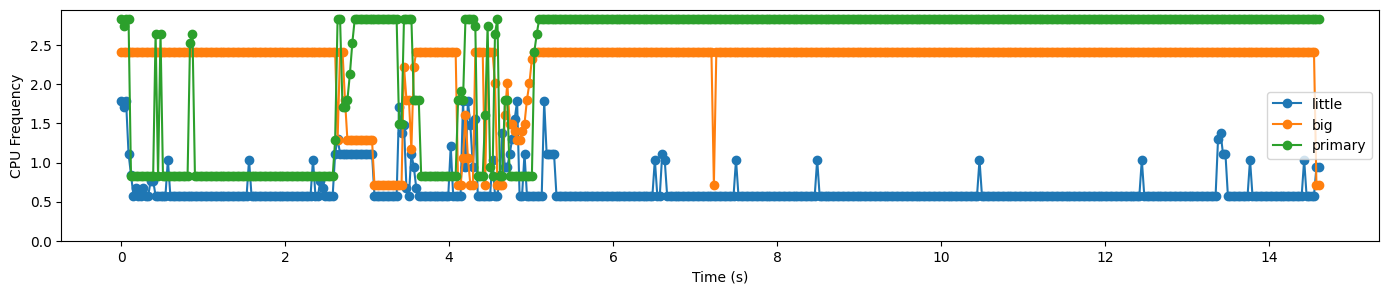

In [2]:
cpu_freq_little = df['cpu_freq']['CUR_FREQ_LITTLE'] / 1e6
cpu_freq_big = df['cpu_freq']['CUR_FREQ_BIG'] / 1e6
cpu_freq_primary = df['cpu_freq']['CUR_FREQ_PRIMARY'] / 1e6
plt.figure(figsize=(17, 3))
cpu_freq_little.plot(label='little', marker='o')
cpu_freq_big.plot(label='big', marker='o')
cpu_freq_primary.plot(label='primary', marker='o')
plt.legend()
plt.ylabel('CPU Frequency')
plt.ylim(0)
plt.show()

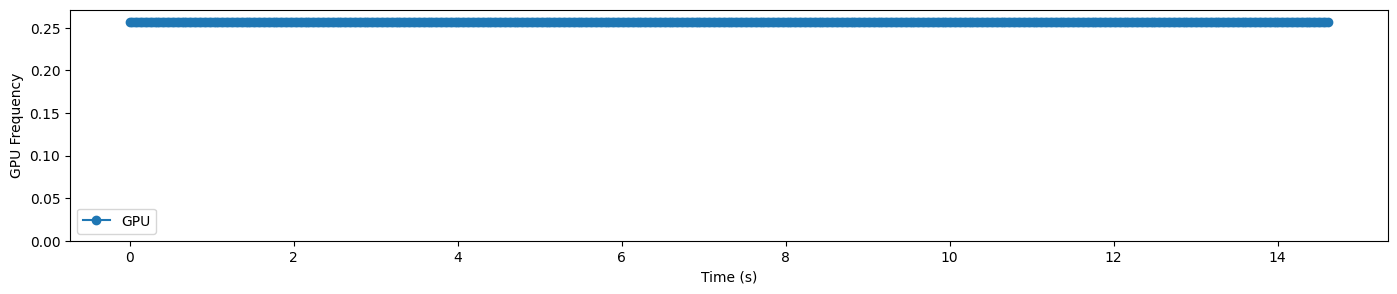

In [5]:
dev_freq_gpu = df['dev_freq']['CUR_FREQ_GPU'] / 1e6
plt.figure(figsize=(17, 3))
dev_freq_gpu.plot(label='GPU', marker='o')
plt.legend()
plt.ylabel('GPU Frequency')
plt.ylim(0)
plt.show()

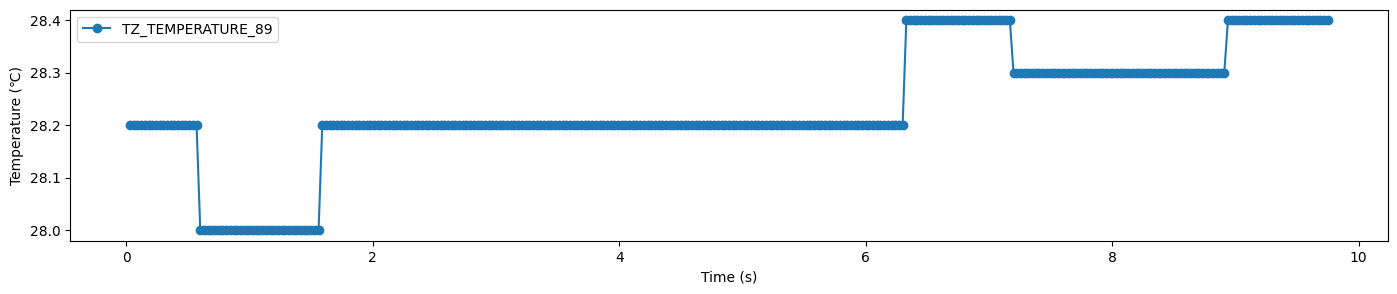

In [4]:
plt.figure(figsize=(17, 3))
for flag in df['thermal'].columns[-1:]:
    temps = df['thermal'][flag] / 1000
    temps.plot(label=flag, marker='o')
plt.legend(ncol=5)
plt.ylabel('Temperature (\u2103)')
plt.show()

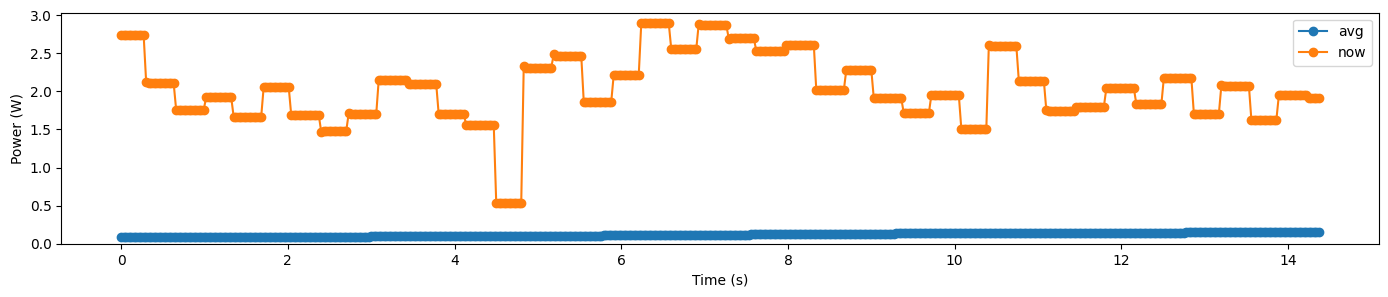

In [8]:
power_avg = - df['power_supply']['CURRENT_AVG_battery'] * df['power_supply']['VOLTAGE_AVG_battery'] / 1000 / 1000
power_now = - df['power_supply']['CURRENT_NOW_battery'] * df['power_supply']['VOLTAGE_NOW_battery'] / 1000 / 1000
plt.figure(figsize=(17, 3))
power_avg.plot(label='avg', marker='o')
power_now.plot(label='now', marker='o')
plt.legend()
plt.ylabel('Power (W)')
plt.ylim(0)
plt.show()